# Workshop: Deep Learning for Natural Language Processing

In this workshop, we will learn how to use deep learning for natural language processing (NLP). We will try to create are own simple chatbot. We will use the [Keras](https://keras.io/) library for the deep learning part and nltk for the NLP part.

We will create a chatbot that will be able to answer predefined questions. In order to do so, you will create a json file containing the questions and the answers such as:

```json
[
    {
        "tag": "greeting",
        "question": ["What is your name?", "Who are you?"],
        "answer": ["My name is Bob", "I am Bob"]
    },
    {
        "tag": "color",
        "question": ["What is your favorite color?"],
        "answer": ["My favorite color is blue"]
    }
]
```

#### Exercise 1: Create the json file and load it

Once you have created the json file you can load it.

In [1]:
import json

with open('data.json') as f:
    data = json.load(f)

#### Exercise 2: Lemmatize the questions

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. For example, the words *walks*, *walking* and *walked* are all forms of the word *walk*. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In this exercise, you will lemmatize all the words in the questions. You can use the [WordNetLemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html) from nltk.

#### Exercise 3: Remove punctuation and lower the questions

In this exercise, you will remove all the punctuation and the uppercase from the questions. You can use the [string.punctuation](https://docs.python.org/3/library/string.html#string.punctuation) variable from python.

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')

lm = WordNetLemmatizer()

patterns = []
encodedWords = []
tagsForPattern = []
tagList = []

responses = {}

for type in data:
    for pattern in type["patterns"]:
        patterns.append(pattern)
        encodedWords.extend(word_tokenize(pattern))
        tagsForPattern.append(type["tag"])
    responses[type["tag"]] = type["responses"]
    if type["tag"] not in tagList:
        tagList.append(type["tag"])

encodedWords = [lm.lemmatize(word.lower()) for word in encodedWords if word not in string.punctuation]
print(encodedWords)
encodedWords = sorted(set(encodedWords))
print(encodedWords)
tagList = sorted(set(tagList))


[nltk_data] Downloading package punkt to /home/Yukiche/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['à', 'qui', "s'adresse", 'cette', 'solution', 'quels', 'sont', 'le', 'client', 'est-ce', 'que', 'cette', 'solution', "s'adresse", 'à', 'moi', 'est-ce', 'que', 'la', 'solution', 'hoori', 'permet', "d'éradiquer", "d'autres", 'mauvaises', 'herbes', 'mi', 'à', 'part', 'le', 'datura', 'est-ce', 'que', "d'autres", 'mauvaises', 'herbes', 'peuvent', 'être', 'éradiquées', 'quels', 'sont', 'le', 'plantes', 'éradiquées', 'comment', 'le', 'drone', 'terrestre', 'va-t-il', 'se', 'débarrasser', 'de', 'mauvaises', 'herbes', 'comment', 'le', 'mauvaises', 'herbes', 'sont-elles', 'éradiquées', 'comment', 'le', 'datura', 'est', 'supprimé', 'comment', 'le', 'mauvaise', 'plantes', 'sont', 'supprimées', 'le', 'drone', 'risquent-ils', "d'abîmer", 'le', 'culture', 'est-ce', "qu'il", 'y', 'a', 'de', 'risques', 'pour', 'mon', 'champ', 'est-ce', 'que', 'la', 'solution', 'hoori', 'requiert', 'une', 'bonne', 'connexion', 'internet', 'est-ce', 'que', 'le', 'drone', 'à', 'besoin', "d'internet", 'est-ce', 'que', 'la'

In [3]:
print(len(tagList), "tags", tagList)
print(len(encodedWords), "encoded words", encodedWords)
print(len(patterns), "patterns")
print(len(tagsForPattern), "tags for patterns")

11 tags ['Au revoir', 'Bonjour', 'Comment', 'Conditions', 'Contact', 'Internet', 'Merci', 'Qui', 'Quoi', 'Risque', 'SAVA']
78 encoded words ['a', 'allez-vous', 'appeler', 'au', 'besoin', 'bonjour', 'bonne', 'cette', 'champ', 'client', 'comment', 'condition', 'connexion', 'contacter', 'coucou', 'couverture', 'culture', "d'abîmer", "d'autres", "d'internet", "d'éradiquer", 'datura', 'de', 'drone', 'débarrasser', 'est', 'est-ce', 'herbes', 'hey', 'hoori', 'internet', 'joindre', 'la', 'le', 'mauvaise', 'mauvaises', 'merci', 'mi', 'moi', 'mon', 'nécessite', 'part', 'permet', 'peuvent', 'plantes', 'pour', "qu'il", 'que', 'quelles', 'quels', 'qui', 'requiert', 'revoir', 'risquent-ils', 'risques', 'réseau', "s'adresse", 'salut', 'se', 'solution', 'sont', 'sont-elles', 'supprimé', 'supprimées', 'terrestre', 'tu', 'une', 'utiliser', 'va', 'va-t-il', 'vas-tu', 'vous', 'y', 'yo', 'à', 'ça', 'éradiquées', 'être']
31 patterns
31 tags for patterns


#### Exercise 4: Encode the words

In this exercise, you will create a list of all the words in the questions without duplicates. Once you have this list, you will create a one-hot encoding for each question. In this situation, a one-hot encoding is a list of 0 and 1. The length of the list is the number of words in the list of all the words. The position of 1 in the list is the position of each word in the list of all the words.

In [4]:
trainingData = []
trainingResult = []

for i, pattern in enumerate(patterns):
    normResult = []
    text = lm.lemmatize(pattern.lower())
    for word in encodedWords:
        if word in text:
            normResult.append(1)
        else:
            normResult.append(0)
    trainingResult.append(normResult)

    normData = [0] * len(tagList)
    normData[tagList.index(tagsForPattern[i])] = 1
    trainingData.append(normData)

In [5]:
print(len(trainingData), "training data")
print(len(trainingResult), "training result")

print(trainingData[0])
print(trainingResult[0])

31 training data
31 training result
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [6]:
# Save the data

data = {
    "encodedWords": encodedWords,
    "tagList": tagList,
    "responses": responses
}

with open("newData.json", "w+") as file:
    json.dump(data, file, indent=4)

In [7]:
import numpy as np

x = np.array(trainingResult)
y = np.array(trainingData)
print(x)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


#### Exercise 5: Create your neural network

In this exercise, you will create your neural network. You will use the [Sequential](https://keras.io/models/sequential/) model from Keras.

In [8]:
from keras.models import Sequential
from keras.layers import Dense,  Dropout

model = Sequential()

model.add(Dense(128, input_shape=(len(x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(len(y[0]), activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

2023-12-23 20:53:30.375339: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 20:53:30.376776: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 20:53:30.397590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 20:53:30.397622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 20:53:30.398292: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10112     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 19083 (74.54 KB)
Trainable params: 19083 (74.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Exercise 6: Train your neural network

In order to train your neural network, you will need to define the input and the output. The input will be the one-hot encoding of the questions and the output will be the one-hot encoding of the TAGs. You will use the [to_categorical](https://keras.io/utils/#to_categorical) function from Keras to create the one-hot encoding of the TAGs.

In [9]:
history = model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 377ms/step - loss: 2.5040 - accuracy: 0.0323
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 2.4951 - accuracy: 0.0323
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 2.4203 - accuracy: 0.0645
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 2.4018 - accuracy: 0.0645
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 2.3994 - accuracy: 0.0645
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 2.4078 - accuracy: 0.0323
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 2.2876 - accuracy: 0.0968
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 2.2975 - accuracy: 0.0645
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 2.2481 - accuracy: 0.2258
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 2.2291 - accuracy: 0.2258
Epoch 11/200
1/1 [=========

#### Exercise 7: Plot the training loss and accuracy

In order to see if your neural network is learning, you will plot the training loss and accuracy. You can use the [history](https://keras.io/models/sequential/#sequential-model-methods) attribute of your model.

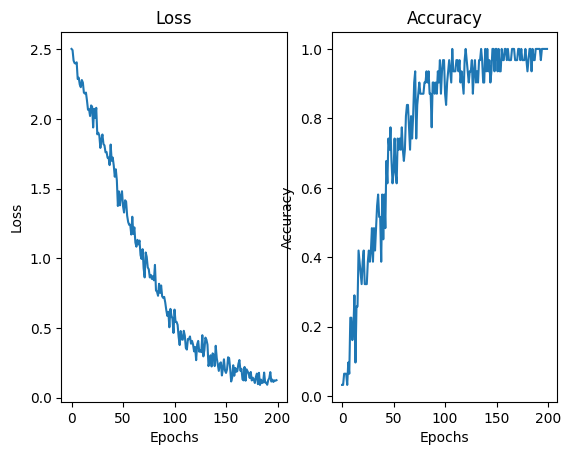

/home/Yukiche/Project/Epitech/Hubs/.venv/lib64/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

model.save("model.h5", history)

#### Exercise 8: Predict the TAG of a question

Now that you have trained your neural network, you can create a function that will predict the TAG of a question.

> Tips: You can add a threshold to the prediction. For example, if the probability of the prediction is less than 0.5, you can return "I don't understand".

In [11]:
import random

def predict(sentences):
    normResult = []
    text = lm.lemmatize(sentences.lower())
    for word in encodedWords:
        if word in text:
            normResult.append(1)
        else:
            normResult.append(0)

    result = model.predict(np.array([normResult]))[0]
    # print(result)
    tagIndex = np.argmax(result)
    if result[tagIndex] > 0.5:
        return {"type": tagList[tagIndex], "result": random.choice(responses[tagList[tagIndex]])} 
    else:
        return {"type": "unknown", "result": "I don't understand"}

In [12]:
print(predict("Quels sont les conditions pour utiliser les drones?"))
print(predict("What is your name?"))
print(predict("sdfjklsdfj"))
print(predict("Comment ça va?"))
print(predict("Merci"))
print(predict("Quel est le prix d'un drone?"))

1/1 [==============================] - 0s 42ms/step
{'type': 'Conditions', 'result': "Nos drones ne peuvent pas opérer la nuit, à proximité d'infrastructures routières ou de sites sensibles (terrain militaire, centrale nucléaire, espaces protégés…)."}
1/1 [==============================] - 0s 11ms/step
{'type': 'Bonjour', 'result': 'Bonjour, comment puis-je vous aider ?'}
1/1 [==============================] - 0s 12ms/step
{'type': 'Bonjour', 'result': 'Bonjour, comment puis-je vous aider ?'}
1/1 [==============================] - 0s 12ms/step
{'type': 'SAVA', 'result': 'Je vais bien, merci! En quoi puis-je vous aider?'}
1/1 [==============================] - 0s 11ms/step
{'type': 'Merci', 'result': 'Je vous en prie!'}
1/1 [==============================] - 0s 13ms/step
{'type': 'unknown', 'result': "I don't understand"}


# Conclusion

In this workshop, you have learned how to handle natural language processing with deep learning. You have also learned how to create a simple chatbot. You can now try to create your own chatbot with more questions and answers.

# To go further

To go further, now that you know how to create a chatbot with predefined questions and answers, you can try to upgrade it. You can try to add a memory system to your chatbot using the [LSTM](https://keras.io/layers/recurrent/#lstm) layer from Keras. You can also try to create a chatbot that will generate its own answers using the [Embedding](https://keras.io/layers/embeddings/) layer from Keras.